In [2]:
import numpy as np
import numpy.random as npr
import pandas as pd

# random seed for reproducibility
npr.seed(12345)

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [3]:
# select analysis to perform
CASE = 1
if CASE == 0:
    data_name = 'DATA'
    # size of each block of data (!= 1 for one-hot)
    BLSIZE = 1
    # number of hidden units
    M = 3
elif CASE == 1:
    dname = 'DATA_b'
    BLSIZE = 4
    M = 2
elif CASE == 2:
    dname = 'DATA_c'
    BLSIZE = 6
    M = 2
fname = dname + '/x_RBM_q0.1.dat'

# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible
v = np.loadtxt(fname, delimiter=' ', dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)

# N = size of input
N = len(v)
# L = size of each sample
L = len(v[1])

# if SPINS = True, values in {-1, +1}, otherwise {0, 1}
SPINS = True

if SPINS:
    # sigmoid takes into account energy diff = 2
    GAP = 2
    # convert 0, 1 -> -1, 1
    v = 2 * v - 1
    VMIN = -1 
else:
    GAP = 1
    VMIN = 0

# range of each initial weight
sigma = np.sqrt(4 / float(L + M))
# initial weights from a normal distribution
w = sigma * npr.randn(L, M)
a = sigma * np.random.randn(L)
b = np.zeros(M)

w0, a0, b0 = np.copy(w), np.copy(a), np.copy(b)

In [20]:
#functions for data visualization
(x_vis, y_vis) = (np.zeros(L), np.linspace(-0.5, 0.5, L))
(x_hid, y_hid) = (np.ones(M), np.linspace(-0.35, 0.35, M))

def mymarker(value):
    if value > 0: return '^'
    elif value < 0: return 'v'
    return 'o'

def myline(value):
    if value > 0: return 'solid'
    elif value < 0: return 'dashed'
    return 'black'

def mycolor(value):
    if value > 0: return 'orangered'
    elif value < 0: return 'teal'
    return 'black'

# plot network with weights and units, all color-coded
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    # remove ticks
    ax.tick_params(left=False, bottom=False)
    ax.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax.yaxis.set_major_formatter(mpl.ticker.NullFormatter())

    # scale for line width based on max weight
    lw_scale = 1 / abs(w).max()
    for i in range(L):
        for j in range(M):
            ex = (y_vis[i], y_hid[j])
            ey = (x_vis[i], x_hid[j])
            ax.plot(ex, ey, c=mycolor(w[i][j]), linestyle=myline(w[i][j]), zorder=1, alpha=lw_scale * abs(w[i][j]))

    # scale for circles representing the units
    circ_scale = 500
    
    # plot visible units
    for i in range(L):
        ax.scatter(y_vis[i], x_vis[i], s=circ_scale * abs(a[i]),
                   zorder=2, c=mycolor(a[i]),marker=mymarker(a[i]))

    # plot hidden units
    for j in range(M):
        ax.scatter(y_hid[j], x_hid[j], s=min(300, circ_scale * abs(b[j])),
                   zorder=2, c=mycolor(b[j]), marker=mymarker(b[j]))
    
    ax.set_title(f'Epoch = {epoch}')
    ax.text(-0.5, 0.85, 'hidden units',bbox=dict(facecolor='w', edgecolor='k'))
    ax.text(-0.5, 0.1, 'visible units',bbox=dict(facecolor='w', edgecolor='k'))

    solid_line = mpl.lines.Line2D([], [], color='orangered', linestyle='solid', label='Positive weight')
    dashed_line = mpl.lines.Line2D([], [], color='teal', linestyle='dashed', label='Negative weight')
    
    up_triang = mpl.lines.Line2D([], [], color='orangered', linewidth='0', marker='^', label='Positive unit')
    dw_triang = mpl.lines.Line2D([], [], color='teal', linewidth='0', marker='v', label='Negative unit')
    
    ax.legend(loc='upper center', handles=[solid_line, dashed_line, up_triang, dw_triang])

    plt.show()
    

def plotgraph2(epoch=0):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    # remove ticks
    ax.tick_params(left=False, bottom=False)
    ax.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax.yaxis.set_major_formatter(mpl.ticker.NullFormatter())

    # scale for line width based on max weight
    lw_scale = 1 / abs(w).max()
    for i in range(L):
        for j in range(M):
            ex = (y_vis[i], y_hid[j])
            ey = (x_vis[i], x_hid[j])
            ax.plot(ex, ey, c='dimgray', zorder=1, alpha=lw_scale, linestyle='dashed')
    
    # scale for circles representing the units
    circ_scale = 350
    
    # plot visible units
    for i in range(L):
        ax.scatter(y_vis[i], x_vis[i], s=circ_scale,
                   zorder=2, c='k',marker='o')

    # plot hidden units
    for j in range(M):
        ax.scatter(y_hid[j], x_hid[j], s=circ_scale,
                   zorder=2, c='k', marker='s')
    
    #ax.set_title(f'Epoch = {epoch}')
    ax.text(-0.5, 0.85, 'hidden units',bbox=dict(facecolor='w', edgecolor='k'))
    ax.text(-0.5, 0.1, 'visible units',bbox=dict(facecolor='w', edgecolor='k'))

    #solid_line = mpl.lines.Line2D([], [], color='orangered', linestyle='solid', label='Positive weight')
    #dashed_line = mpl.lines.Line2D([], [], color='teal', linestyle='dashed', label='Negative weight')
    
    #up_triang = mpl.lines.Line2D([], [], color='orangered', linewidth='0', marker='^', label='Positive unit')
    #dw_triang = mpl.lines.Line2D([], [], color='teal', linewidth='0', marker='v', label='Negative unit')
    
    #ax.legend(loc='upper center', handles=[solid_line, dashed_line, up_triang, dw_triang])

    plt.show()

In [6]:
# put phase = 1 if in positive CD phase, if in negative --> phase != 1
def activate(in_layer, weights, bias, phase, info=False):
    act = bias + np.dot(in_layer, weights)

    # prepare a list of -1s or 0s (depending on SPINS = T/F)
    out_layer = np.full(act.shape, VMIN, dtype=int)

    if phase == 1:
        # here we don’t want one-hot blocks in the output
        p = npr.random_sample((len(act), ))
        # like below but simpler (no cdf, only two levels)
        prob = 1 / (1 + np.exp(-GAP * act))
        out_layer[p < prob] = 1
    else:
        # how many random samples do we need? len(in_layer) // block
        num_gen = len(act) // BLSIZE
        p = npr.random_sample((num_gen, ))
        for i in range(num_gen):
            # cumulated boltzmann weights
            prob = np.cumsum(np.exp(act[(i * BLSIZE):((i + 1) * BLSIZE)]))
            # normalization (so the tail of cdf is 1)
            prob /= prob[-1]
            # put out_layer = 1 in the previous index to the one where
            # the generated number is higher than the cdf 
            out_layer[np.argmax(p[i] < prob) + i * BLSIZE] = 1

    if info: # print debug
       print(f'in_layer = {in_layer}') 
       print(f'act = {act}')
       print(f'prob = {prob}')
       print(f'out_layer = {out_layer}')

    return out_layer

In [7]:
def rmsprop(data, model, s, beta, eps, lrate):
    g = data - model # gradient
    s1 = beta * s + (1 - beta) * g**2
    d = lrate * g / np.sqrt(s1 + eps)

    return s1, d

def adam(data, model, m, s, t, beta, eps, lrate):
    g = data - model # gradient
    m0 = beta * m + (1 - beta) * g
    s0 = beta * s + (1 - beta) * g**2

    m1 = m0 / (1 - beta**(t + 1))
    s1 = s0 / (1 - beta**(t + 1))
    d = lrate * m1 / np.sqrt(s1 + eps)

    return m0, s0, d

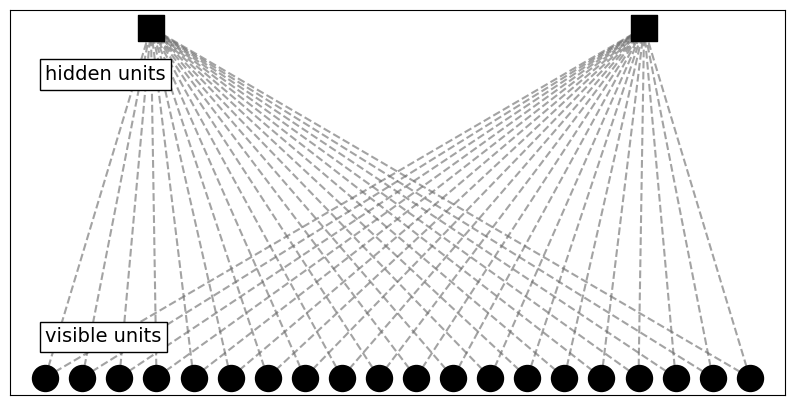

l_rate = 0.8333333333333337


KeyboardInterrupt: 

In [21]:
# learning rate
lrate = 1.0
# minibatch size and count
mb_size, mb_count = 500, 0

# model parameters
beta = 0.9
eps = 1e-8
sw, mw = 0, 0
sa, ma = 0, 0
sb, mb = 0, 0

# choose between 'rmsprop', 'adam', 'vanilla'
model = 'rmsprop'
# number of divergent steps
div_steps = 2
# number of epochs
nepochs = 100

# train model
for epoch in range(nepochs):
    # aggregate normalization of batch statistics and learning rate
    lrate_m = lrate / mb_size

    # loop over visible units
    for k in range(N):
        if mb_count == 0:
            # initialization step in the minibatch
            v_data, v_model = np.zeros(L), np.zeros(L)
            h_data, h_model = np.zeros(M), np.zeros(M)
            vh_data, vh_model = np.zeros((L, M)), np.zeros((L, M))

        # positive CD phase: generate h
        h = activate(v[k], w, b, phase=1)
        # negative CD phase: generate fantasy vf
        vf = activate(h, w.T, a, phase=0)

        # additional divergent steps
        for i in range(div_steps - 1):
            hf = activate(vf, w, b, phase=1)
            vf = activate(hf, w.T, a, phase=0)

        # one more positive CD phase: fantasy hf from fantasy vf
        hf = activate(vf, w, b, phase=1)

        # update quantities
        v_data += v[k]
        v_model += vf
        h_data += h
        h_model += hf
        vh_data += np.outer(v[k].T, h)
        vh_model += np.outer(vf.T, hf)

        mb_count += 1
        if mb_count == mb_size: # reached the end of minibatch
            # gradient of the likelihood: follow it along
            # its positive direction

            # Vanilla GD
            if model == 'van':
                dw = lrate_m * (vh_data - vh_model)
                da = lrate_m * (v_data - v_model)
                db = lrate_m * (h_data - h_model)
            # RMSprop
            elif model == 'rmsprop':
                sw, dw = rmsprop(vh_data, vh_model, sw,
                                 beta, eps, lrate_m)
                sa, da = rmsprop(v_data, v_model, sa,
                                 beta, eps, lrate_m)
                sb, db = rmsprop(h_data, h_model, sb,
                                 beta, eps, lrate_m)
            # ADAM
            elif model == 'adam':
                mw, sw, dw = adam(vh_data, vh_model, mw, sw, epoch,
                                  beta, eps, lrate_m)
                ma, sa, da = adam(v_data, v_model, ma, sa, epoch,
                                  beta, eps, lrate_m)
                mb, sb, db = adam(h_data, h_model, mb, sb, epoch,
                                  beta, eps, lrate_m)
                                
            w = w + dw
            a = a + da
            b = b + db
            mb_count = 0 # move to the next minibatch

    # randomize the order of input data
    npr.shuffle(v)
    # decrease the learning rate if not using Adam
    if (model != 'adam'):
        lrate = lrate / (1 + 0.01 * lrate)

    if epoch % 20 == 19:
        plotgraph2(epoch + 1)
        if (model != 'adam'):
            print(f'l_rate = {lrate}')